### Data loading and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Conv2D, Dropout, MaxPooling2D, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(np.min(x_train), np.max(x_train))

0 255


In [4]:
# Normalizing data
x_train = x_train/255
x_test = x_test/255

print(np.min(x_train), np.max(x_train))

0.0 1.0


In [7]:
print('Train shape before reshaping:', x_train.shape, y_train.shape)
print('Test shape before reshaping:', x_test.shape, y_test.shape)

x_train_re = np.reshape(x_train, (len(x_train), -1))
x_test_re = np.reshape(x_test, (len(x_test), -1))

print('\nTrain shape after reshaping:', x_train_re.shape, y_train.shape)
print('Test shape after reshaping:', x_test_re.shape, y_test.shape)

Train shape before reshaping: (60000, 28, 28) (60000,)
Test shape before reshaping: (10000, 28, 28) (10000,)

Train shape after reshaping: (60000, 784) (60000,)
Test shape after reshaping: (10000, 784) (10000,)


In [ ]:
print(np.min(y_train), np.max(y_train))
print(y_train)

0 9
[5 0 4 ... 5 6 8]


In [ ]:
# One-hot encoding targets
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)
print(y_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]], shape=(60000, 10), dtype=float32)


### Model Structures


In [ ]:
# Setting Random seed to 0
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
# Multi-Layer Perceptron
input_shape = (784,)

mlp_model = tf.keras.Sequential(
    name = 'mlp',
    layers=[
      Input(input_shape, name='input_layer'),
      Dense(units=128, activation='relu', name='hidden_1'),
      Dense(units=128, activation='relu', name='hidden_2'),
      Dense(units=10, activation='softmax', name='output_layer')
    ]
)

mlp_model.summary()

Model: "mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_2 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

The neural network takes as input a vector of 728 values. It consists of two hidden layers, each containing 128 neurons with a ReLU activation function. The output layer has 10 neurons (equal to the number of classes in the problem) and uses a softmax activation function to produce normalized probabilities as the output.

In [ ]:
# Convolutional Neural Network
num_conv_layers = 2
num_hidden_layers = 2

cnn_model = tf.keras.Sequential(name='cnn_model', layers = [Input((28, 28, 1), name='input_layer')])

for i in range(num_conv_layers):
  cnn_model.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', name=f'convolutional_layer_{i+1}'))
  cnn_model.add(Dropout(rate=0.4, name=f'dropout_{i+1}'))
  cnn_model.add(MaxPooling2D(name=f'maxpool_{i+1}'))

# Flattening
cnn_model.add(Flatten())

# MLP
for i in range(num_hidden_layers):
  cnn_model.add(Dense(units=128, activation='relu', name=f'hidden_layer_{i+1}'))
cnn_model.add(Dense(units=10, activation='softmax', name='output_layer'))

cnn_model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolutional_layer_1 (Conv2D)       │ (None, 24, 24, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_1 (MaxPooling2D)             │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolutional_layer_2 (Conv2D)       │ (None, 8, 8, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_2 (MaxPooling2D)             │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,130 (988.79 KB)

 Trainable params: 253,130 (988.79 KB)

 Non-trainable params: 0 (0.00 B)

The neural network consists of 2 convolutional layers, and after each layer, we add a dropout and a max-pooling layer:

- **Dropout** acts as a regularizer to prevent the neural network from overfitting. During training, it randomly deactivates neurons, forcing the network to utilize all of its neurons rather than over-relying on specific ones.

- **MaxPooling2D** is a technique used to reduce the resolution of the image (or feature map) as it passes through the network. Specifically, it takes the image and, for every 2x2 pixel block, selects the pixel with the highest value and places it in the position of the four pixels.

After the information passes through the convolutional layers, we flatten the output to convert it into a vector. This vector is then passed to an **MLP (Multi-Layer Perceptron)** for classification. The MLP has the same structure as the one described earlier.

### Model Training

In [ ]:
mlp_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
print("Fit model on training data")
mlp_history = mlp_model.fit(
    x_train_re,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test_re, y_test)
)

Fit model on training data
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8829 - loss: 0.4015 - val_accuracy: 0.9656 - val_loss: 0.1074
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9675 - loss: 0.1107 - val_accuracy: 0.9698 - val_loss: 0.0935
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9791 - loss: 0.0738 - val_accuracy: 0.9737 - val_loss: 0.0887
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9845 - loss: 0.0527 - val_accuracy: 0.9747 - val_loss: 0.0881
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0393 - val_accuracy: 0.9769 - val_loss: 0.0825
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9750 - val_loss: 0.0915
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0249 - val_accuracy: 0.9733 - val_loss: 0.1037
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accurac

In [ ]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

print("Fit model on training data")
cnn_history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test)
)

Fit model on training data
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9132 - loss: 0.2829 - val_accuracy: 0.9886 - val_loss: 0.0643
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0565 - val_accuracy: 0.9896 - val_loss: 0.0556
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0413 - val_accuracy: 0.9878 - val_loss: 0.0447
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0366 - val_accuracy: 0.9917 - val_loss: 0.0358
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.9910 - val_loss: 0.0386
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0249 - val_accuracy: 0.9921 - val_loss: 0.0316
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9933 - loss: 0.0223 - val_accuracy: 0.9915 - val_loss: 0.0352
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accur

In [ ]:
# Extracting information for MLP
mlp_train_acc = mlp_history.history['accuracy']
mlp_test_acc = mlp_history.history['val_accuracy']
mlp_train_loss = mlp_history.history['loss']
mlp_test_loss = mlp_history.history['val_loss']

# Extracting information for CNN
cnn_train_acc = cnn_history.history['accuracy']
cnn_test_acc = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_test_loss = cnn_history.history['val_loss']

epochs = np.arange(1, 51, 1)

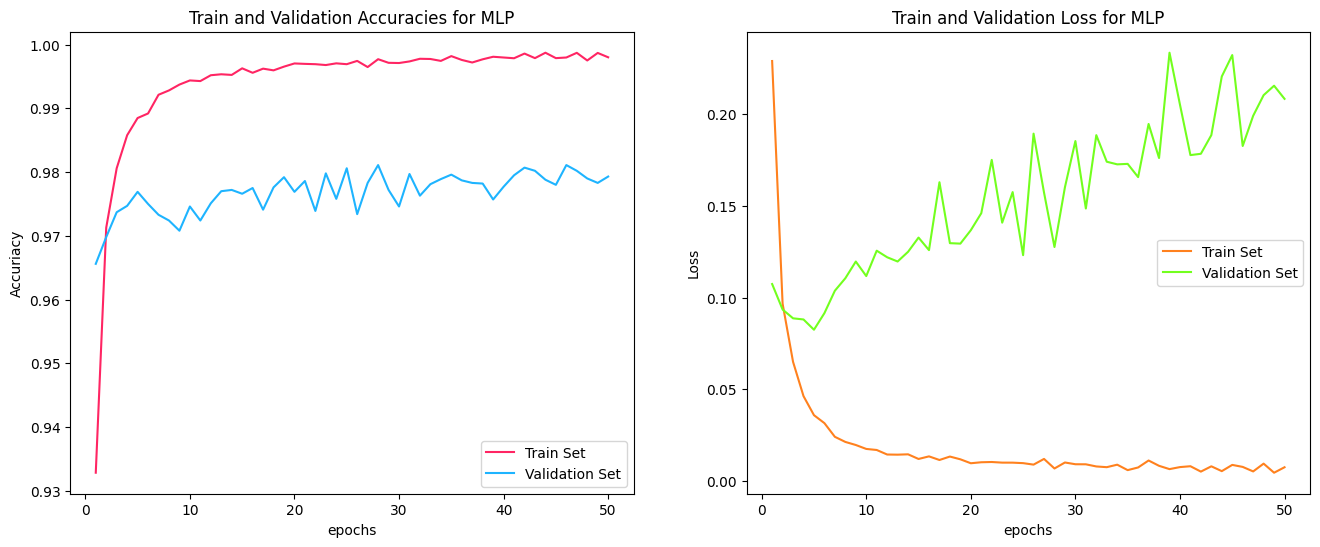

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuarcy plot
ax[0].plot(epochs, mlp_train_acc, label='Train Set', color='#ff2563')
ax[0].plot(epochs, mlp_test_acc, label='Validation Set', color='#1eb4ff')
ax[0].set_title('Train and Validation Accuracies for MLP')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuriacy')
ax[0].legend()

# Loss plot
ax[1].plot(epochs, mlp_train_loss, label='Train Set', color='#ff811e')
ax[1].plot(epochs, mlp_test_loss, label='Validation Set', color='#73ff1e')
ax[1].set_title('Train and Validation Loss for MLP')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

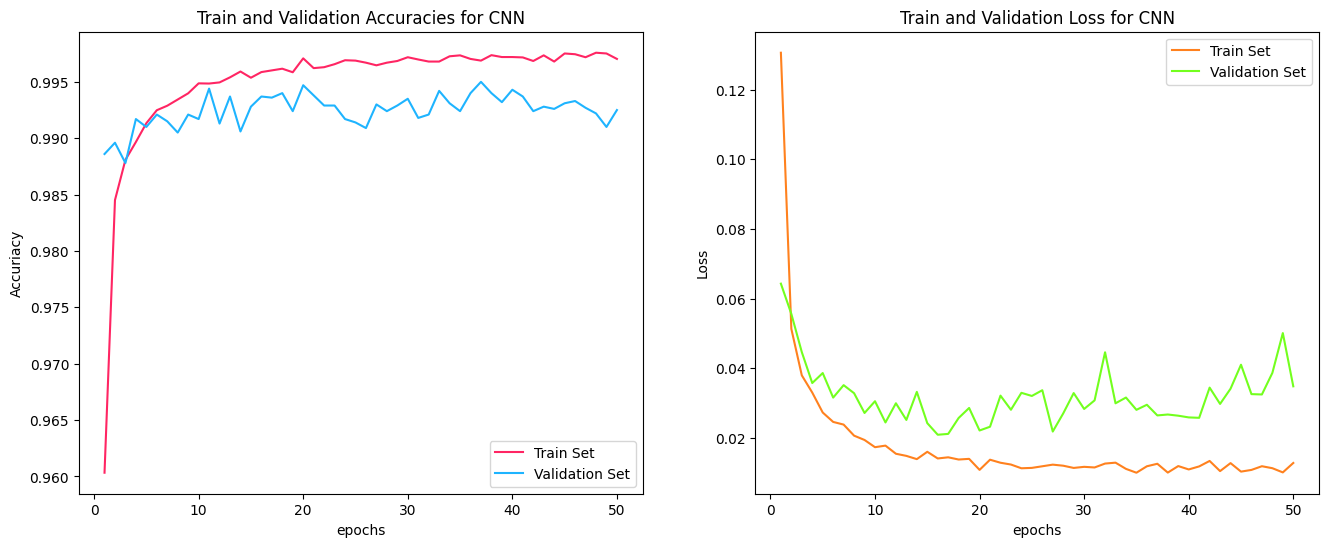

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuarcy plot
ax[0].plot(epochs, cnn_train_acc, label='Train Set', color='#ff2563')
ax[0].plot(epochs, cnn_test_acc, label='Validation Set', color='#1eb4ff')
ax[0].set_title('Train and Validation Accuracies for CNN')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuriacy')
ax[0].legend()

# Loss plot
ax[1].plot(epochs, cnn_train_loss, label='Train Set', color='#ff811e')
ax[1].plot(epochs, cnn_test_loss, label='Validation Set', color='#73ff1e')
ax[1].set_title('Train and Validation Loss for CNN')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

To improve the performance of the CNN model, we can:
- **Apply padding** in the convolutional layers to maintain the same resolution during convolution.
- **Add an additional convolutional layer** to enable the detection of more complex features.
- **Increase the number of filters per layer** to extract more features.
- **Reduce the convolution window size** for more detailed feature extraction.

In [ ]:
# Improved Convolutional Neural Network
num_conv_layers = 3
num_hidden_layers = 2

cnn_model = tf.keras.Sequential(name='cnn_model', layers = [Input((28, 28, 1), name='input_layer')])

for i in range(num_conv_layers):
  cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name=f'convolutional_layer_{i+1}'))
  cnn_model.add(Dropout(rate=0.4, name=f'dropout_{i+1}'))
  cnn_model.add(MaxPooling2D(name=f'maxpool_{i+1}'))

# Flattening
cnn_model.add(Flatten())

# MLP
for i in range(num_hidden_layers):
  cnn_model.add(Dense(units=128, activation='relu', name=f'hidden_layer_{i+1}'))
cnn_model.add(Dense(units=10, activation='softmax', name='output_layer'))

cnn_model.summary()

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolutional_layer_1 (Conv2D)       │ (None, 28, 28, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_1 (MaxPooling2D)             │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolutional_layer_2 (Conv2D)       │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_2 (MaxPooling2D)             │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolutional_layer_3 (Conv2D)       │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_3 (MaxPooling2D)             │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,834 (1.76 MB)

 Trainable params: 461,834 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

print("Fit model on training data")
cnn_history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(x_test, y_test)
)

Fit model on training data
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8942 - loss: 0.3278 - val_accuracy: 0.9885 - val_loss: 0.0928
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9788 - loss: 0.0673 - val_accuracy: 0.9870 - val_loss: 0.0781
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9846 - loss: 0.0531 - val_accuracy: 0.9900 - val_loss: 0.0606
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.9902 - val_loss: 0.0454
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9880 - loss: 0.0389 - val_accuracy: 0.9917 - val_loss: 0.0404
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0379 - val_accuracy: 0.9928 - val_loss: 0.0343
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0332 - val_accuracy: 0.9944 - val_loss: 0.0328
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc

In [ ]:
# Extracting information for CNN
cnn_train_acc = cnn_history.history['accuracy']
cnn_test_acc = cnn_history.history['val_accuracy']
cnn_train_loss = cnn_history.history['loss']
cnn_test_loss = cnn_history.history['val_loss']

epochs = np.arange(1, 51, 1)

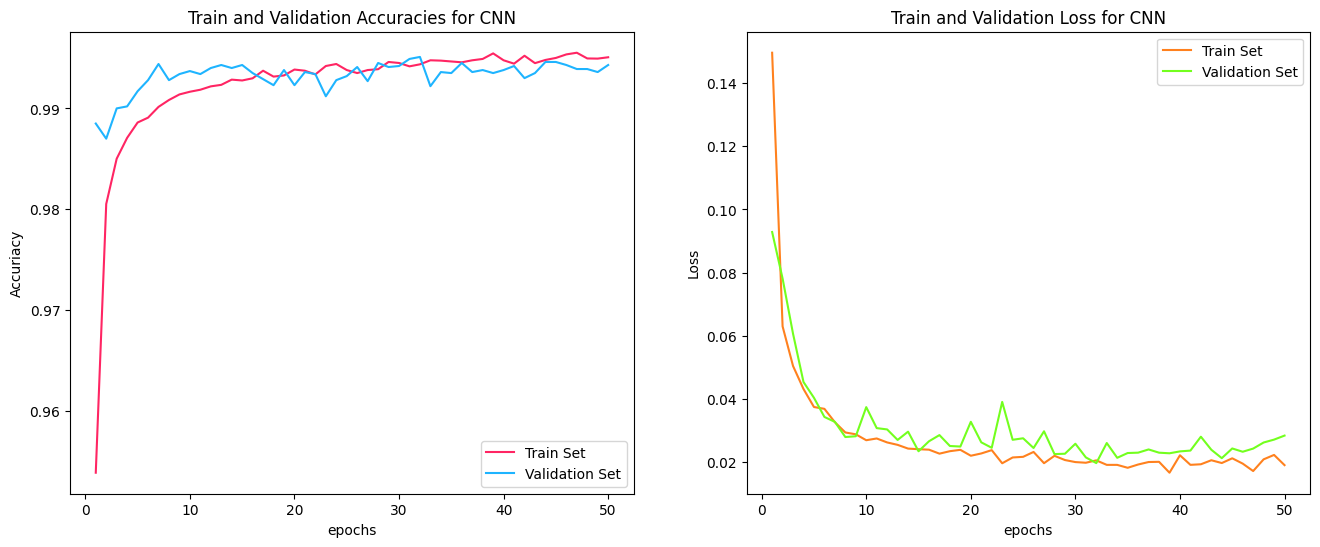

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuarcy plot
ax[0].plot(epochs, cnn_train_acc, label='Train Set', color='#ff2563')
ax[0].plot(epochs, cnn_test_acc, label='Validation Set', color='#1eb4ff')
ax[0].set_title('Train and Validation Accuracies for CNN')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Accuriacy')
ax[0].legend()

# Loss plot
ax[1].plot(epochs, cnn_train_loss, label='Train Set', color='#ff811e')
ax[1].plot(epochs, cnn_test_loss, label='Validation Set', color='#73ff1e')
ax[1].set_title('Train and Validation Loss for CNN')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

The performance of the model has improved significantly.